[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fisamz/Repositorio_MCDAA/blob/main/Tarea5/Tarea5.ipynb)

# Tarea 5 — Agrupamiento 
**Alumno:** Fisam Zavala  
**Dataset:** Mental Health and Lifestyle Habits (2019–2024)  
**Fuente:** [Kaggle – Atharva Soundankar](https://www.kaggle.com/datasets/atharvasoundankar/mental-health-and-lifestyle-habits-2019-2024)


## K-Means Clustering

En esta primera parte se aplicará el algoritmo **K-Means**, uno de los métodos de agrupamiento no supervisado más utilizados para identificar estructuras subyacentes en datos numéricos.  
Este algoritmo busca particionar los datos en *k* grupos (clusters) de manera que cada observación pertenezca al grupo cuyo centroide (media de las observaciones del grupo) esté más cercano.

Matemáticamente, K-Means minimiza la suma de las distancias cuadradas entre los puntos y sus centroides:

$$
J = \sum_{i=1}^{k} \sum_{x_j \in C_i} ||x_j - \mu_i||^2
$$ 

donde:  
\( C_i \): conjunto de puntos asignados al clúster *i*  
\( \mu_i \): centroide del clúster *i*



El algoritmo sigue los pasos:
1. Seleccionar *k* centroides iniciales (puede hacerse aleatoriamente).
2. Asignar cada punto al clúster más cercano según distancia euclidiana.
3. Recalcular los centroides como el promedio de los puntos asignados.
4. Repetir los pasos 2 y 3 hasta que los centroides se estabilicen o se alcance el número máximo de iteraciones.

### Estrategia para determinar el número óptimo de clústeres
Existen varias métricas para determinar el número adecuado de grupos *k*.  
En este análisis se usarán dos métodos:
- **Método del Codo (Elbow Method)**: evalúa la inercia (suma de distancias al centroide) para diferentes valores de *k* y busca el punto donde la reducción deja de ser significativa.  
- **Coeficiente de Silhouette**: mide qué tan bien está asignado cada punto a su clúster; valores cercanos a 1 indican mejor separación entre grupos.

### Objetivo de esta sección
- Limpiar y seleccionar las variables numéricas del dataset.  
- Aplicar K-Means con distintos valores de *k*.  
- Determinar el número óptimo de grupos usando las métricas anteriores.  
- Visualizar los resultados con gráficos y análisis interpretativo.


Variables numéricas utilizadas para el clustering: ['Sleep Hours', 'Work Hours per Week', 'Screen Time per Day (Hours)', 'Social Interaction Score', 'Happiness Score']
Dimensión del conjunto de datos: (3000, 5)


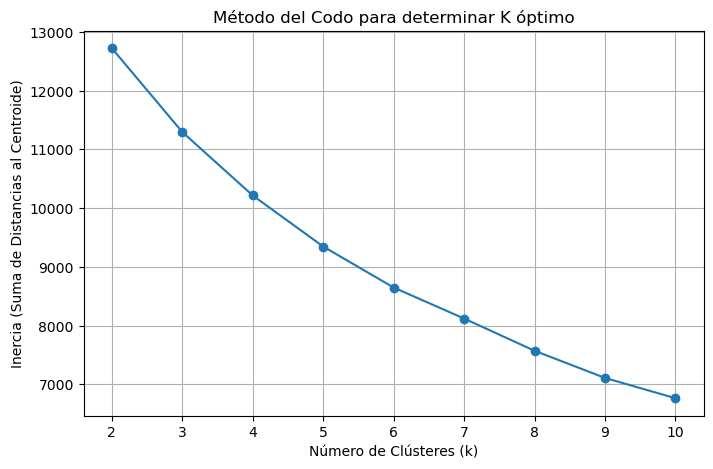

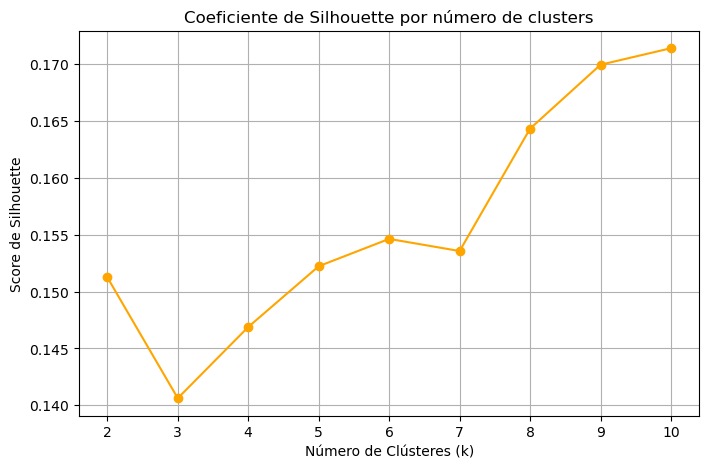

,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
Cluster,,,,,
0,6.46,38.15,6.14,5.97,3.07
1,6.41,41.51,3.21,5.53,5.35
2,6.56,38.49,6.15,4.91,7.75


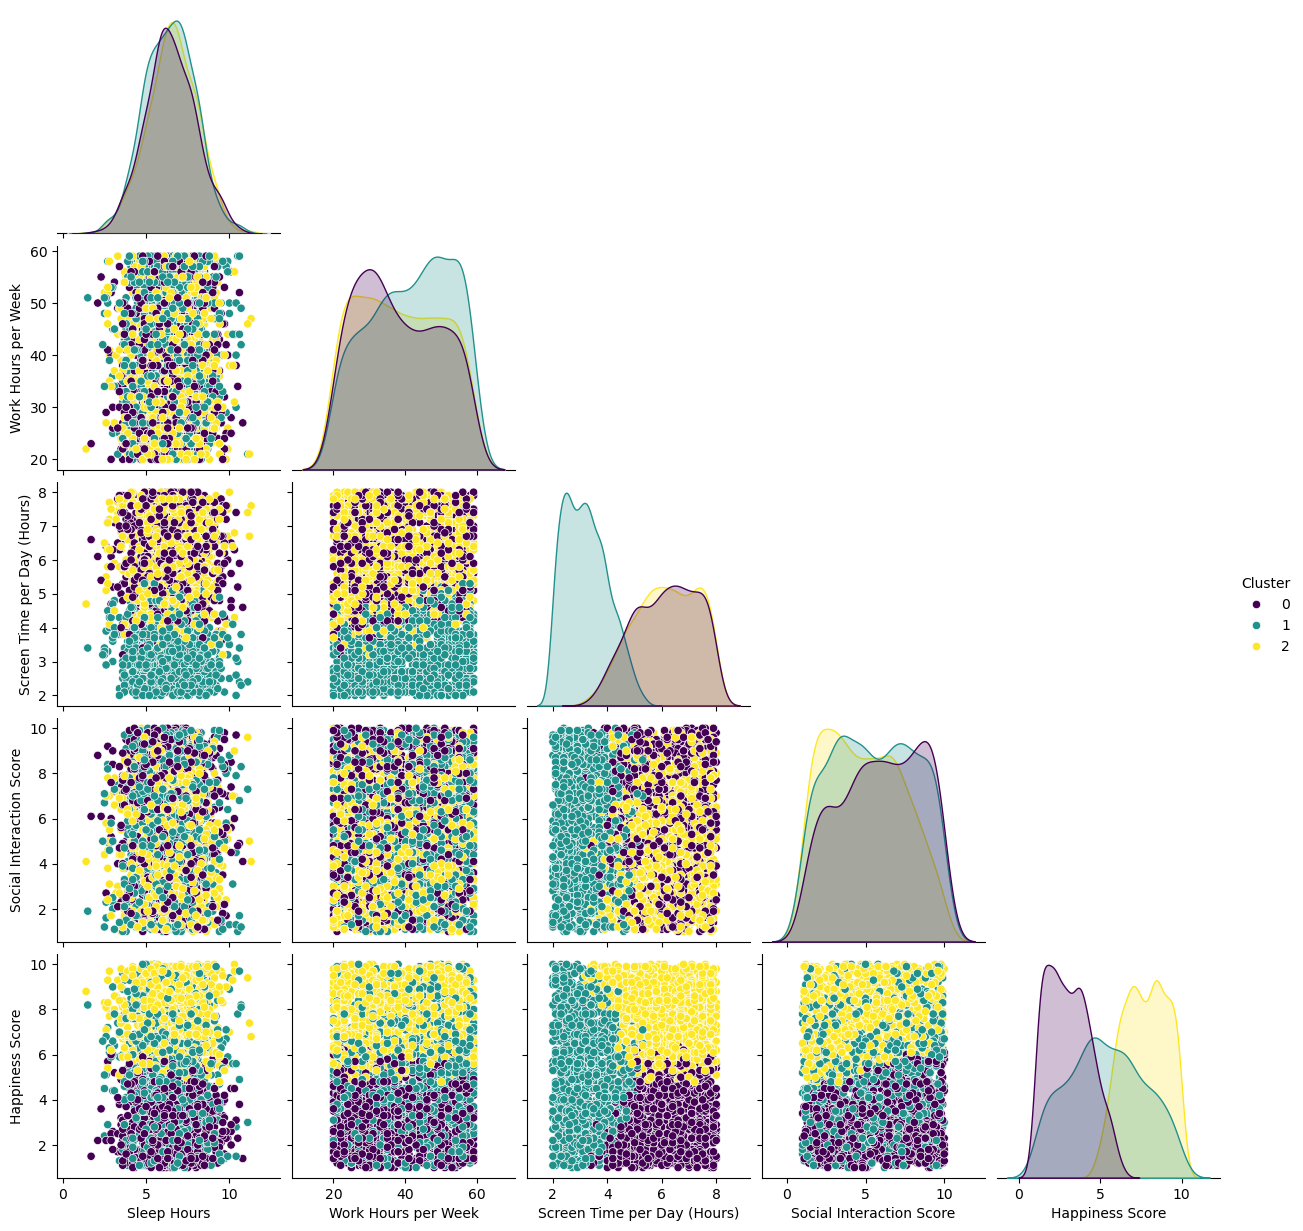

In [28]:
# ==============================================
# TAREA 5 - Agrupamiento (K-Means)
# ==============================================

# 1. Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Cargar el dataset
df = pd.read_csv("../Data/Mental_Health_Lifestyle_Dataset.csv")

# 3. Seleccionar solo variables numéricas
num_df = df.select_dtypes(include=[np.number]).dropna()

# Excluir la variable 'Age' del análisis
if 'Age' in num_df.columns:
    num_df = num_df.drop(columns=['Age'])

print(f"Variables numéricas utilizadas para el clustering: {list(num_df.columns)}")
print(f"Dimensión del conjunto de datos: {num_df.shape}")

# 4. Escalamiento de los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df)

# 5. Determinar número óptimo de clústeres (Método del Codo)
inertia = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o', linestyle='-')
plt.title('Método del Codo para determinar K óptimo')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Inercia (Suma de Distancias al Centroide)')
plt.grid(True)
plt.show()

# 6. Validación adicional con Coeficiente de Silhouette
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

plt.figure(figsize=(8,5))
plt.plot(K, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silhouette por número de clusters')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Score de Silhouette')
plt.grid(True)
plt.show()

# 7. Aplicar K-Means con el K óptimo (ejemplo: k=3, se puede ajustar tras revisar gráficas)
k_optimo = 3
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

num_df['Cluster'] = labels_final

# 8. Visualización básica de los clusters
#plt.figure(figsize=(8,6))
#sns.scatterplot(x=num_df.iloc[:,0], y=num_df.iloc[:,1], hue=num_df['Cluster'], palette='viridis')
#plt.title('Visualización de Clústeres (K-Means)')
#plt.xlabel(num_df.columns[0])
#plt.ylabel(num_df.columns[1])
#plt.legend(title='Cluster')
#plt.show()

# 9. Análisis descriptivo de cada clúster
cluster_summary = num_df.groupby('Cluster').mean().round(2)
display(cluster_summary)

sns.pairplot(num_df, hue='Cluster', corner=True, palette='viridis')


# DBSCAN Clustering

A diferencia de **K-Means**, que requiere especificar el número de clústeres, **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) agrupa los datos en función de la **densidad de puntos** en el espacio.

Su principal ventaja es que puede detectar **grupos de forma arbitraria** (no solo esféricos) y **manejar valores atípicos (outliers)** automáticamente.

### Fundamento matemático
DBSCAN define tres conceptos clave:

1. **Épsilon (ε)**: radio máximo para considerar vecinos.
2. **MinPts**: número mínimo de puntos dentro del radio ε para formar un clúster.
3. **Densidad alcanzable**: un punto pertenece a un clúster si puede alcanzarse desde otro punto a través de una secuencia de puntos vecinos (distancia ≤ ε).

Formalmente:
- Si un punto \( p \) tiene al menos *MinPts* puntos dentro de una distancia epsilon, se convierte en un **punto central**.
- Los puntos dentro de su vecindad se agregan al clúster.
- Los puntos que no pertenecen a ningún clúster se marcan como **ruido (outliers)**.

### Ventajas principales
- No necesita definir \( k \) previamente.
- Detecta clústeres de forma irregular.
- Identifica outliers de forma natural.

### Limitaciones
- Sensible a la escala de los datos.
- Los parámetros epsilon y *MinPts* requieren ajuste manual o heurístico.

En este caso, se aplicará DBSCAN sobre las mismas variables numéricas que se usaron en el K-Means.  
Se ajustarán los parámetros ε y *MinPts* mediante experimentación visual para obtener una segmentación significativa.


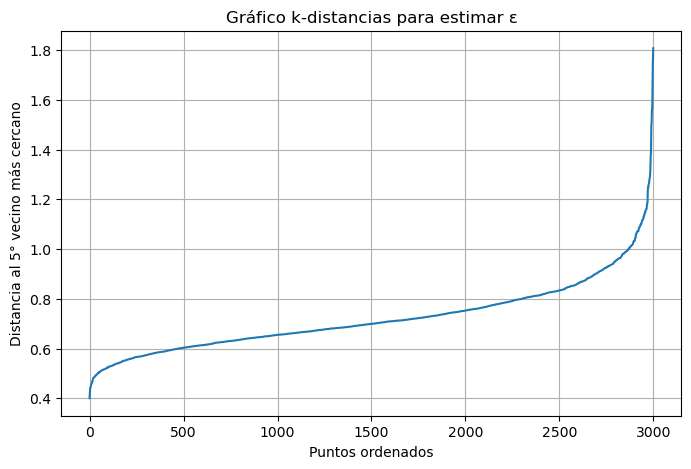

DBSCAN_Cluster
 0    2643
-1     350
 1       7
Name: count, dtype: int64
Porcentaje de ruido: 11.7%


,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
DBSCAN_Cluster,,,,,
-1,6.37,38.39,5.03,5.34,5.72
0,6.48,39.63,5.10,5.48,5.36
1,8.29,30.71,2.31,8.09,1.64


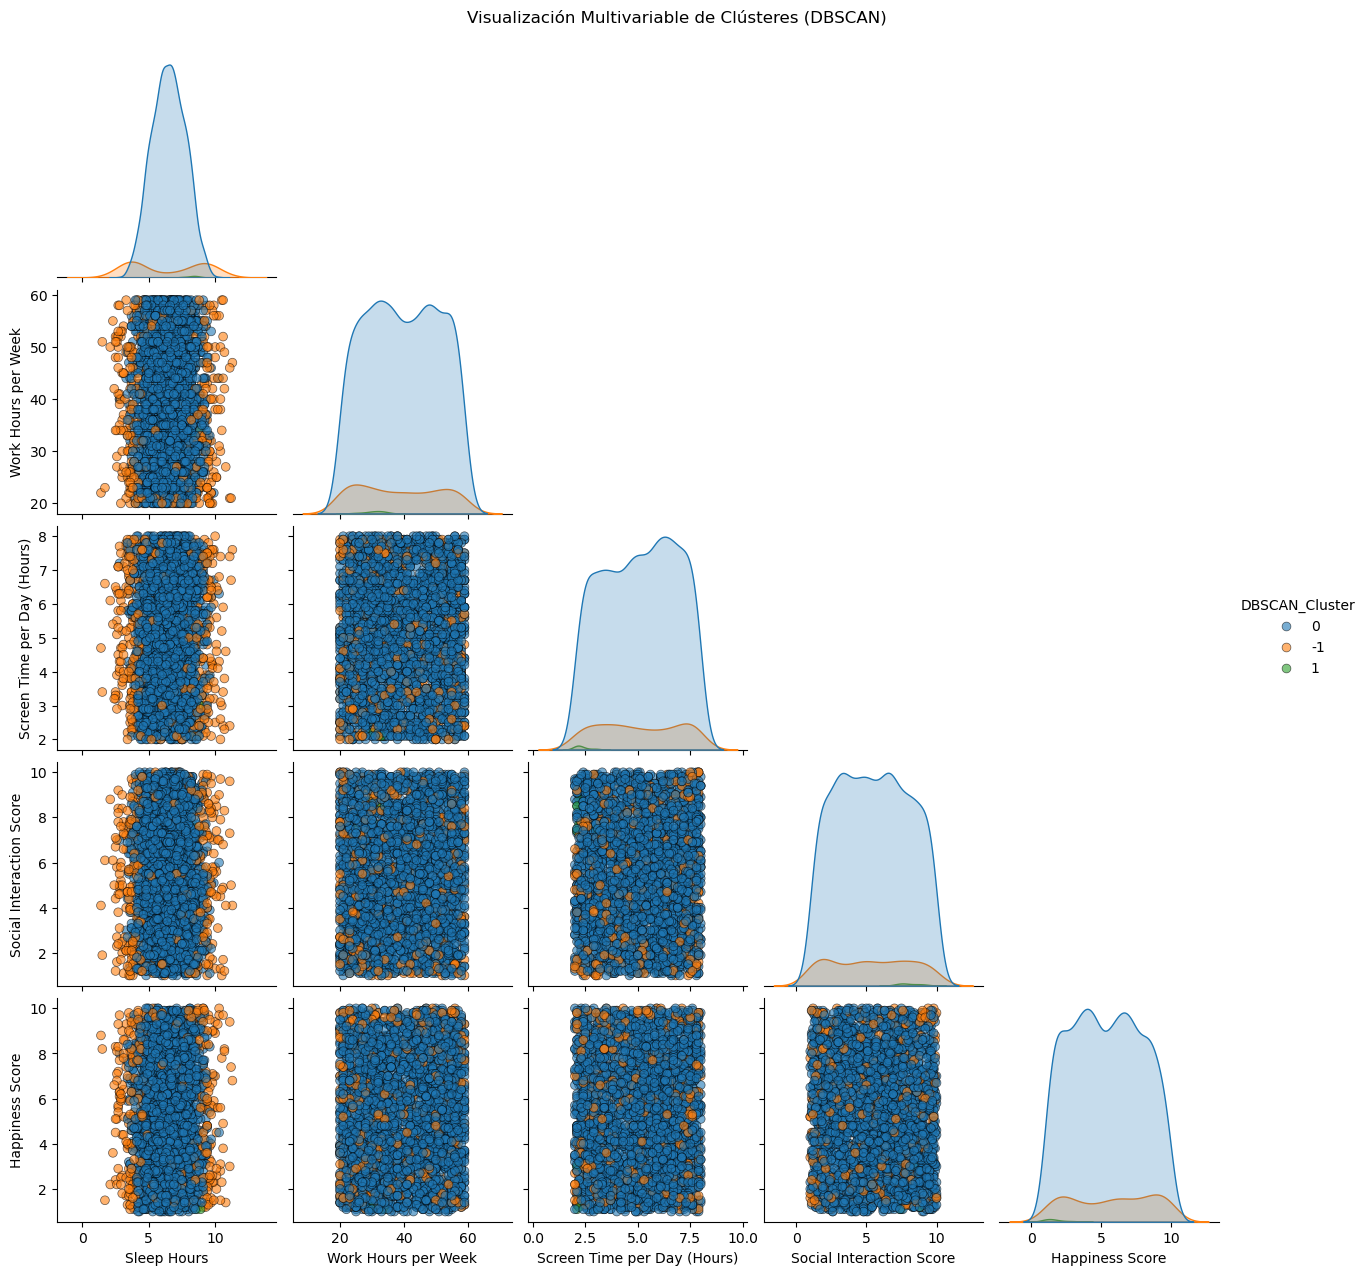

In [47]:
# ==============================================
# TAREA 5 - Agrupamiento (DBSCAN)
# ==============================================

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# 1. Calcular el gráfico k-distancias para estimar epsilon
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, indices = neighbors_fit.kneighbors(X_scaled)

distances = np.sort(distances[:,4])  # distancia al 5° vecino más cercano
plt.figure(figsize=(8,5))
plt.plot(distances)
plt.title("Gráfico k-distancias para estimar ε")
plt.xlabel("Puntos ordenados")
plt.ylabel("Distancia al 5° vecino más cercano")
plt.grid(True)
plt.show()

# 2. Con base en el gráfico anterior (punto de inflexión visual), se elige ε
eps_value = .77 
min_samples_value = 5

dbscan = DBSCAN(eps=eps_value, min_samples=min_samples_value)
dbscan_labels = dbscan.fit_predict(X_scaled)

# 3. Agregar los clústeres al DataFrame
num_df['DBSCAN_Cluster'] = dbscan_labels

# 4. Contar cuántos puntos quedaron en cada grupo
print(num_df['DBSCAN_Cluster'].value_counts())

noise_ratio = np.sum(dbscan_labels == -1) / len(dbscan_labels)
print(f"Porcentaje de ruido: {noise_ratio:.1%}")

# 5. Visualización básica de los clústeres
#plt.figure(figsize=(8,6))
#sns.scatterplot(
#    x=num_df['Sleep Hours'], 
#    y=num_df['Work Hours per Week'], 
#    hue=num_df['DBSCAN_Cluster'], 
#    palette='tab10'
#)
#plt.title('Visualización de Clústeres (DBSCAN)')
#plt.xlabel('Sleep Hours')
#plt.ylabel('Work Hours per Week')
#plt.legend(title='Cluster')
#plt.show()

# 6. Tabla resumen por clúster
dbscan_summary = num_df.groupby('DBSCAN_Cluster').mean().round(2)
display(dbscan_summary)

num_df['DBSCAN_Cluster'] = num_df['DBSCAN_Cluster'].astype(str)

# Eliminar columna 'Cluster' previa si existe
if 'Cluster' in num_df.columns:
    num_df = num_df.drop(columns=['Cluster'])

# Crear pairplot con seaborn
sns.pairplot(
    num_df,
    hue='DBSCAN_Cluster',
    diag_kind='kde',
    corner=True,
    palette='tab10',
    plot_kws={'alpha': 0.6, 's': 40, 'edgecolor': 'k'}
)

plt.suptitle('Visualización Multivariable de Clústeres (DBSCAN)', y=1.02)
plt.show()


### Reflexión metodológica

El modelo **DBSCAN** logró identificar solo un clúster principal y un grupo pequeño adicional, con un 11.7% de ruido.  
Aunque el nivel de ruido se mantiene dentro de los rangos considerados aceptables (5–25%), el resultado evidencia que la mayoría de los registros presentan una **densidad homogénea**, por lo que el algoritmo no pudo formar más regiones densas diferenciadas.

Este hallazgo sugiere que **el conjunto de datos no presenta agrupamientos naturales basados en densidad**, sino una distribución más uniforme.  
Por tanto, mientras K-Means consiguió segmentar los individuos según patrones promedio de sueño, trabajo y felicidad, DBSCAN evidenció **la ausencia de regiones densas bien separadas** — un resultado metodológicamente valioso, pues demuestra que distintos métodos de agrupamiento revelan diferentes estructuras (o la falta de ellas) en los mismos datos.


### Estrategia para determinar el número de grupos en DBSCAN

A diferencia de algoritmos como **K-Means**, **DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) **no requiere definir el número de clústeres \( k \)** de manera previa.  
Su funcionamiento se basa en la **densidad de los puntos** en el espacio, identificando regiones densas como clústeres y considerando los puntos dispersos como *ruido*.  

Por esta razón, **las estrategias tradicionales** para determinar el número óptimo de grupos, como:
- El **método del codo** (basado en la inercia),
- El **índice de Calinski–Harabasz**, y  
- El **índice de Davies–Bouldin**,  

**no son directamente aplicables a DBSCAN**, ya que todas estas métricas asumen que el número de clústeres \( k \) está previamente definido y que todos los puntos pertenecen a algún grupo (sin ruido).

En cambio, DBSCAN depende de dos hiperparámetros clave:
1. **ε (epsilon)** → el radio máximo de vecindad que define qué tan cerca deben estar los puntos para considerarse parte de una misma región densa.  
2. **min_samples** → el número mínimo de puntos necesarios para que una región se considere un clúster.

El parámetro **ε** puede estimarse mediante el **gráfico de k-distancias**, donde se identifica visualmente el punto de inflexión (*“codo”*) en la curva.  
El parámetro **min_samples** suele establecerse empíricamente, recomendando un valor cercano al doble del número de dimensiones del conjunto de datos.

En conclusión, **DBSCAN no busca un número de clústeres predefinido**, sino que **descubre automáticamente cuántos grupos densos existen** en los datos según los parámetros de densidad elegidos.


## Índice de Calinski–Harabasz (K-Means)

El índice de **Calinski–Harabasz (CH)** evalúa la calidad de un particionado de clústeres comparando la **dispersión entre clústeres** con la **dispersión dentro de los clústeres**:

$$
CH(k) \;=\; \frac{\text{Tr}(B_k)}{\text{Tr}(W_k)} \cdot \frac{n-k}{k-1}
$$

donde:
- B_k es la **varianza entre grupos** (qué tan separados están los centroides),
- W_k es la **varianza intra-grupo** (qué tan compactos son los clústeres),
- \( n \) es el número de observaciones y \( k \) el número de clústeres.

**Interpretación:** valores **más altos** de CH indican **mejor separación** y **mayor compacidad** simultáneamente.  
En la práctica se calcula \( CH(k) \) para varios \( k \) (p. ej. 2–10) y se elige el \( k \) con **CH máximo** (o un máximo local estable).


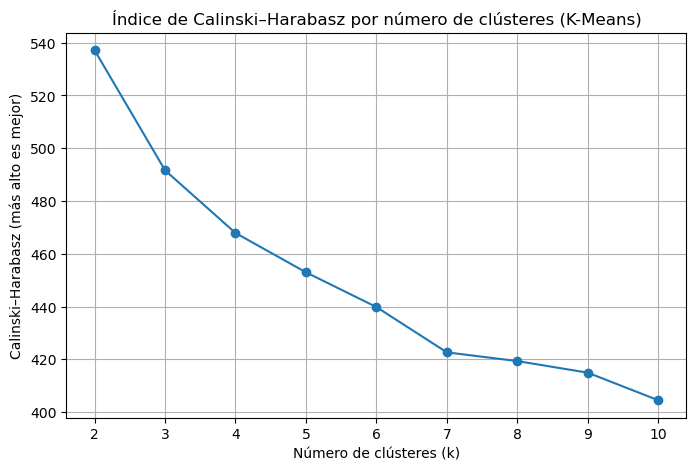

K óptimo por Calinski–Harabasz: k = 2 (CH = 537.12)


,Sleep Hours,Work Hours per Week,Screen Time per Day (Hours),Social Interaction Score,Happiness Score
Cluster,,,,,
0,6.55,49.51,4.98,5.51,5.53
1,6.41,29.67,5.20,5.43,5.26


In [49]:
# ==============================================
# Calinski–Harabasz con K-Means
# ==============================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# 1) Carga y selección numérica (excluyendo Age)
df = pd.read_csv("../Data/Mental_Health_Lifestyle_Dataset.csv")
num_df = df.select_dtypes(include=[np.number]).copy()
if 'Age' in num_df.columns:
    num_df = num_df.drop(columns=['Age'])

# Manejo simple de NA (puedes ajustar a tu criterio)
num_df = num_df.dropna()

# 2) Estandarización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(num_df.values)

# 3) Búsqueda de k óptimo con CH
Ks = range(2, 11)
ch_scores = []

for k in Ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = km.fit_predict(X_scaled)
    score = calinski_harabasz_score(X_scaled, labels)
    ch_scores.append(score)

# 4) Visualización de CH vs k
plt.figure(figsize=(8,5))
plt.plot(list(Ks), ch_scores, marker='o')
plt.title('Índice de Calinski–Harabasz por número de clústeres (K-Means)')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('Calinski–Harabasz (más alto es mejor)')
plt.grid(True)
plt.show()

# 5) k con CH máximo
best_k = int(Ks[np.argmax(ch_scores)])
print(f"K óptimo por Calinski–Harabasz: k = {best_k} (CH = {max(ch_scores):.2f})")

# 6) Entrenamiento final y resumen de clústeres
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(X_scaled)

num_df_kmeans = num_df.copy()
num_df_kmeans['Cluster'] = labels_final

cluster_summary = num_df_kmeans.groupby('Cluster').mean().round(2)
display(cluster_summary)


### Conclusión del índice de Calinski–Harabasz

El análisis del **índice de Calinski–Harabasz (CH)** muestra que el valor máximo se alcanza en **k = 2 (CH = 537.12)**, indicando que la configuración con dos clústeres ofrece el **mejor equilibrio entre separación y cohesión interna**.  
A partir de este punto, el índice disminuye de forma continua, lo que sugiere que agregar más clústeres no mejora la estructura del agrupamiento y, por el contrario, fragmenta artificialmente los datos.

Los resultados del modelo **K-Means con k = 2** revelan una división clara en función de las **horas de trabajo por semana**, siendo esta la variable más determinante para la separación:

- **Clúster 0:** personas con jornadas laborales largas (≈ 50 horas semanales) y niveles de felicidad ligeramente mayores.  
- **Clúster 1:** personas con menor carga laboral (≈ 30 horas semanales) y felicidad algo más baja.

En conjunto, el índice CH respalda que el modelo con **dos grupos** describe adecuadamente las diferencias estructurales del conjunto de datos, proporcionando una segmentación interpretable y coherente con las variables analizadas.


### Referencias científicas relacionadas con la felicidad y los hábitos de vida

A continuación, se presentan algunos artículos científicos y revistas académicas que publican investigaciones relacionadas con la **felicidad, el bienestar subjetivo y los hábitos de vida**. Estas referencias pueden servir como sustento teórico y contexto para los análisis realizados en este trabajo.

1. **Can Lifestyle Habits Predict Happiness? An Exploratory Machine Learning Study Using a Visual Data Mining Platform**  
   *Journal of Pakistan Medical Students (JPMS)*  
   Este estudio analiza si los hábitos de vida auto-reportados —como sueño, tiempo de pantalla y estrés— pueden predecir niveles de felicidad mediante técnicas de minería de datos y aprendizaje automático.  
   [https://jpmsonline.com/article/can-lifestyle-habits-predict-happiness-an-exploratory-machine-learning-study-using-a-visual-data-mining-platform-755](https://jpmsonline.com/article/can-lifestyle-habits-predict-happiness-an-exploratory-machine-learning-study-using-a-visual-data-mining-platform-755)

2. **Prospective Associations of Happiness and Optimism with Lifestyle Habits and Health Outcomes**  
   *BMC Public Health* (2019)  
   Analiza longitudinalmente cómo la felicidad y el optimismo predicen hábitos saludables y bienestar general.  
   [https://pmc.ncbi.nlm.nih.gov/articles/PMC6697576/](https://pmc.ncbi.nlm.nih.gov/articles/PMC6697576/)

3. **Subjective Well-being Predicts Health Behavior in a 9-Years Follow-up**  
   *Preventive Medicine Reports* (2021)  
   Evalúa cómo el bienestar subjetivo puede anticipar comportamientos de salud a largo plazo, evidenciando un vínculo bidireccional entre felicidad y estilo de vida.  
   [https://www.sciencedirect.com/science/article/pii/S2211335521003260](https://www.sciencedirect.com/science/article/pii/S2211335521003260)

4. **Graphical Model Analysis of Subjective Well-Being and Various Factors**  
   *Scientific Reports* (Nature Portfolio, 2025)  
   Emplea modelos gráficos para estudiar la relación entre bienestar subjetivo y múltiples dimensiones de la vida, como relaciones sociales, sueño y satisfacción laboral.  
   [https://www.nature.com/articles/s41598-025-98064-2](https://www.nature.com/articles/s41598-025-98064-2)

5. **The Relationship Between Subjective Well-Being and Food: A Qualitative Study of Children’s Perspectives**  
   *International Journal of Qualitative Studies on Health and Well-Being* (2023)  
   Examina cómo la alimentación influye en la percepción de bienestar, destacando la relación entre hábitos diarios y salud emocional.  
   [https://www.tandfonline.com/doi/full/10.1080/17482631.2023.2189218](https://www.tandfonline.com/doi/full/10.1080/17482631.2023.2189218)
